# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
from collections import deque
from torchviz import make_dot, make_dot_from_trace
from ddpg_agent import Agent
import os
import torch
import requests, zipfile, io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Download the Unity environment depending on your operating system.

In [2]:
## Choose your operating system:
#      mac
#      windows_x86
#      windows_x86_64
#      linux_x86
#      linux_x86_64
os_name = "windows_x86_64"

'''
# Version 1: One (1) Agent

os_env_dict = {
    "mac": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher.app.zip", "Reacher.app"],
    "windows_x86": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86.zip", "Reacher_Windows_x86/Reacher.exe"],
    "windows_x86_64": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86_64.zip", "Reacher_Windows_x86_64/Reacher.exe"],
    "linux_x86": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux.zip", "Reacher_Linux/Reacher.x86"],
    "linux_x86_64": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux.zip", "Reacher_Linux/Reacher.x86_64"]
}
'''

# Version 2: Twenty (20) Agents
os_env_dict = {
    "mac": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher.app.zip", "Reacher.app"],
    "windows_x86": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86.zip", "Reacher_Windows_x86/Reacher.exe"],
    "windows_x86_64": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86_64.zip", "Reacher_Windows_x86_64/Reacher.exe"],
    "linux_x86": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux.zip", "Reacher_Linux/Reacher.x86"],
    "linux_x86_64": ["https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux.zip", "Reacher_Linux/Reacher.x86_64"]
}

def download_environment(os_name):
    environment_path = os_env_dict[os_name][1]
    if not os.access(environment_path, os.F_OK):
        url = os_env_dict[os_name][0]
        file = url.split('/')[-1]
        r = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall()    
    return environment_path

environment_path = download_environment(os_name)
print("Environment: {}".format(environment_path))

# output folder for trained weigths
os.makedirs("weights", exist_ok=True)

# output folder for network architecture images
os.makedirs("resources", exist_ok=True)

Environment: Reacher_Windows_x86_64/Reacher.exe


Start the environment

In [3]:
env = UnityEnvironment(file_name=environment_path)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. DDPQ-Function
Trains the agent over a maximum number of episodes until the target score is reached.<br>
The agent will be trained until the mean target score of **30.0** over **100** consecutive episodes is reached.

In [6]:
TARGET_SCORE = 30.0

def ddpg(env, agent, n_episodes=10000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []       # episodic scores
    avg_scores = []   # moving average over 100 episodes and over all agents
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        states = env_info.vector_observations              # get the current states
        agent.reset()
        score = np.zeros(agent.num_agents)
        for t in range(max_t):
            actions = agent.act(states)
         
            env_info = env.step(actions)[brain_name]       # send the actions to the environment
            next_states = env_info.vector_observations     # get the next states
            rewards = env_info.rewards                     # get the rewards
            dones = env_info.local_done                    # see if episode has finished
            
            agent.step(states, actions, rewards, next_states, dones) # send the results to the Agent
            states = next_states
            score += rewards
            if any(dones):
                break 
                
        # calculate and print results
        episode_score = np.mean(score)
        scores_deque.append(episode_score)
        scores.append(episode_score)
        avg_score = np.mean(scores_deque)
        avg_scores.append(avg_score)         
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score), end='')
      
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            
        # stop training if target score was reached
        if avg_score >= TARGET_SCORE:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            break
            
    return scores, avg_scores

### 4. Train Function
Trains the agent over a maximum number of episodes and plots the scores.

In [7]:
def train(env, agent, n_episodes=10000, max_t=1000):
    scores, means = ddpg(env, agent, n_episodes=n_episodes, max_t=max_t)
    
    # plot the scores
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.plot(np.arange(len(means)), means, linestyle='--')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(('Score', 'Avg Score'), fontsize='xx-large')
    plt.show()

### 5. Evaluation Function
Evaluates a trained agent over a number of episodes and plots the scores.

In [8]:
def evaluate(env, agent, episodes=100):    
    scores = []  # list containing scores from each episode

    for i_episode in range(1, episodes+1):
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        states = env_info.vector_observations              # get the current states
        score = np.zeros(agent.num_agents)    
        while True:
            actions = agent.act(states)                    # get the next actions
            
            env_info = env.step(actions)[brain_name]       # send the actions to the environment
            next_states = env_info.vector_observations     # get the next states
            rewards = env_info.rewards                     # get the rewards
            dones = env_info.local_done                    # see if episode has finished
            
            score += rewards 
            states = next_states
            if any(dones):
                break 
                
        episode_score = np.mean(score)
        scores.append(episode_score) 
        print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, episode_score))
              
    avg_score = np.mean(scores)
    print('\nAverage Score over {} episodes: {:.2f}!'.format(episodes, avg_score))

    # plot the scores
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.plot(np.arange(len(scores)), [np.mean(scores)]*len(scores), linestyle='--')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(('Score', 'Avg Score'), fontsize='xx-large')
    plt.show()

### 6. Training and Evaluation
Train and evaluate an DDPG agent.

You can skip the cells for training to use the pretrained weights for evaluation.<br>
Also you can skip the cells for displaying the network architecture.

Create an **DDPQ-Agent** with the state-/action-size and agent count of the environment.

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=2)

Display the network architecture of the DDPQ agent. 

You can skip the cells for displaying the network architecture.<br>
In order to run the cells it's necessary to have [Graphviz](https://graphviz.org/download/) installed.

Actor network architecture

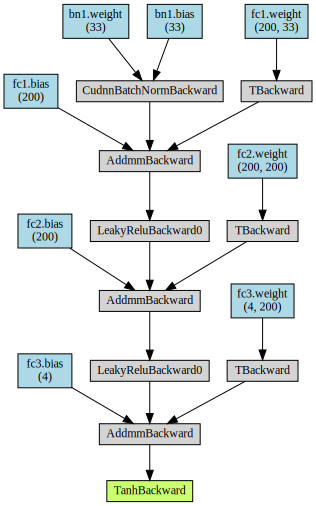

In [10]:
from model import Actor

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
random_states = torch.randn(num_agents, state_size).to(device)
network = Actor(state_size, action_size, 2).to(device)
dot = make_dot(network(random_states), params=dict(network.named_parameters()))
dot.attr(size="10,10") 
dot.render("resources/DDPG-Agent-Actor", format="png")
dot

Critic network architeture

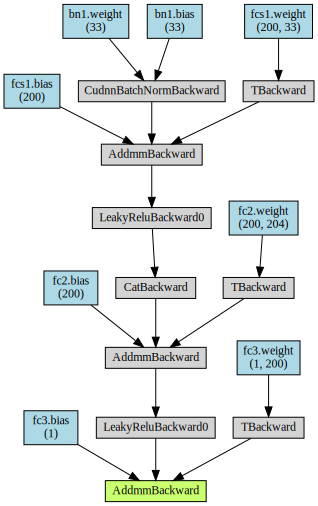

In [11]:
from model import Critic

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
random_states = torch.randn(num_agents, state_size).to(device)
random_actions = torch.randn(num_agents, action_size).to(device)
network = Critic(state_size, action_size, 2).to(device)
dot = make_dot(network(random_states, random_actions), params=dict(network.named_parameters()))
dot.attr(size="10,10") 
dot.render("resources/DDPG-Agent-Critic", format="png")
dot

Train the agent. You can skip the training to use the pretrained weights for evaluation.

Episode 100	Average Score: 22.42
Episode 122	Average Score: 30.25
Environment solved in 122 episodes!	Average Score: 30.25


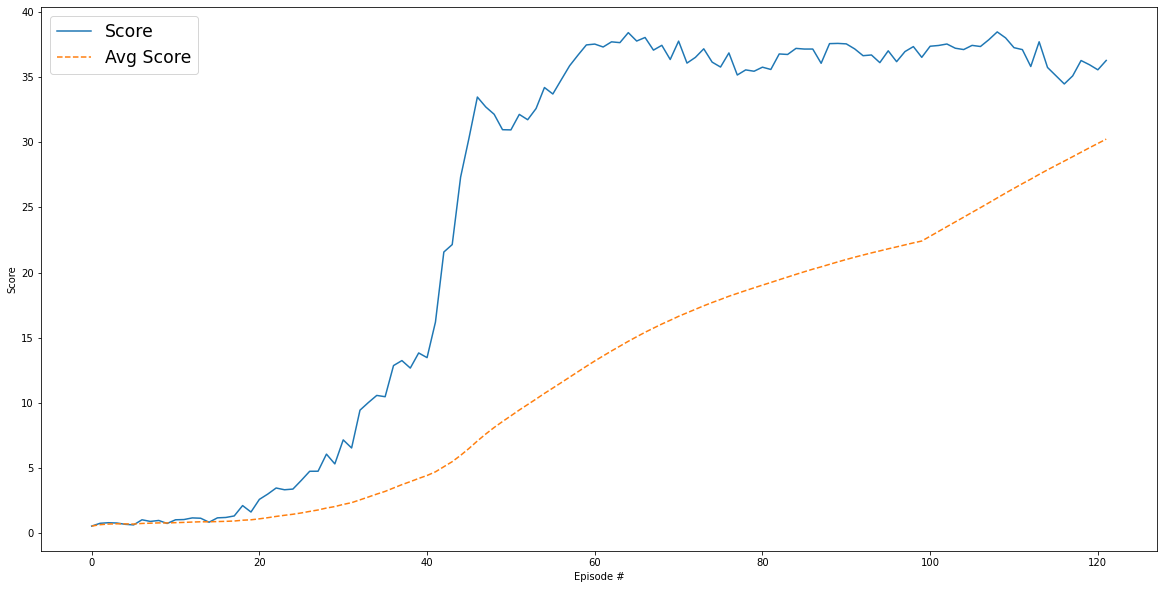

In [12]:
train(env, agent, n_episodes=1000, max_t=1000)
agent.save('weights')  # Save trained weight to file

For the evaluation, the mean score will be determined over exactly **100** consecutive episodes.


Episode 1	Score: 37.05
Episode 2	Score: 37.42
Episode 3	Score: 36.28
Episode 4	Score: 36.19
Episode 5	Score: 37.33
Episode 6	Score: 37.08
Episode 7	Score: 37.19
Episode 8	Score: 37.08
Episode 9	Score: 37.31
Episode 10	Score: 36.60
Episode 11	Score: 37.38
Episode 12	Score: 37.12
Episode 13	Score: 37.11
Episode 14	Score: 37.16
Episode 15	Score: 37.63
Episode 16	Score: 36.65
Episode 17	Score: 36.73
Episode 18	Score: 36.85
Episode 19	Score: 37.12
Episode 20	Score: 36.32
Episode 21	Score: 37.44
Episode 22	Score: 36.66
Episode 23	Score: 36.23
Episode 24	Score: 36.44
Episode 25	Score: 36.98
Episode 26	Score: 36.69
Episode 27	Score: 36.76
Episode 28	Score: 37.09
Episode 29	Score: 36.83
Episode 30	Score: 37.12
Episode 31	Score: 37.20
Episode 32	Score: 36.35
Episode 33	Score: 36.95
Episode 34	Score: 37.62
Episode 35	Score: 37.21
Episode 36	Score: 37.45
Episode 37	Score: 37.11
Episode 38	Score: 36.86
Episode 39	Score: 37.19
Episode 40	Score: 36.75
Episode 41	Score: 36.95
Episode 42	Score: 36.73
E

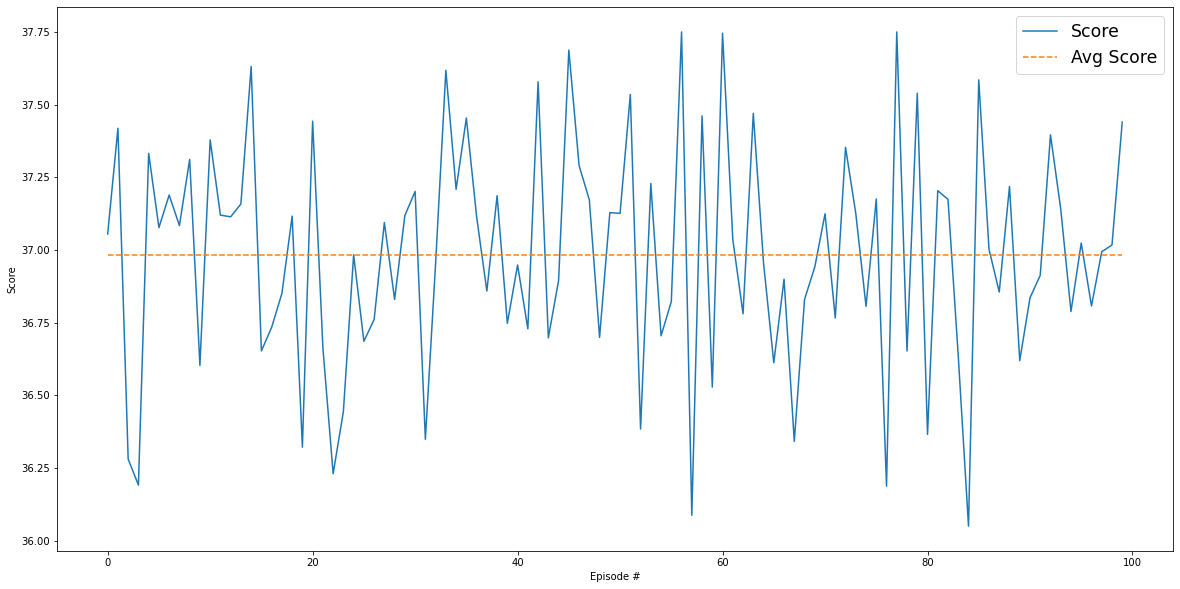

In [13]:
agent.load('weights')  # load pretrained weights from file
evaluate(env, agent, episodes=100)

When finished, you can close the environment.

In [ ]:
env.close()